<a href="https://colab.research.google.com/github/eovallemagallanes/Digital-Image-Processing/blob/main/lecture11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier method

1. Choose a threshold value $D$.
2. For a given pixel, compare its value $p$ with the mean $\mu$ of the values of its eight neighbours.
3. If $|p - \mu|$ > D, then classify the pixel as noisy, otherwise not.
4. If the pixel is noisy, replace its value with $\mu$; otherwise leave its value unchanged.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import skimage
import skimage.color as skic
import skimage.filters as skif
import skimage.data as skid
import skimage.util as sku
from skimage.filters import median
from skimage.morphology import square

from scipy import signal

In [3]:
def sp_noise(image, prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(image.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white

    return output

In [4]:
def outlierconv2d(image, D=10):
    kernel = 1/8 * np.ones((3, 3))
    kernel[1, 1] = 0

    img_filter = signal.convolve2d(image, kernel, mode='same')
    r = 1.*(abs(image - img_filter)-D > 0)

    new_image = r*img_filter + (1-r)*image
    return new_image


In [5]:
# working in range [0.0, 255.0]
img = skimage.img_as_float(skid.chelsea())*255.0

# convert to gray-scale image
gray_img = skic.rgb2gray(img)

# add s&p noise
noise_img = sp_noise(gray_img, 0.3)

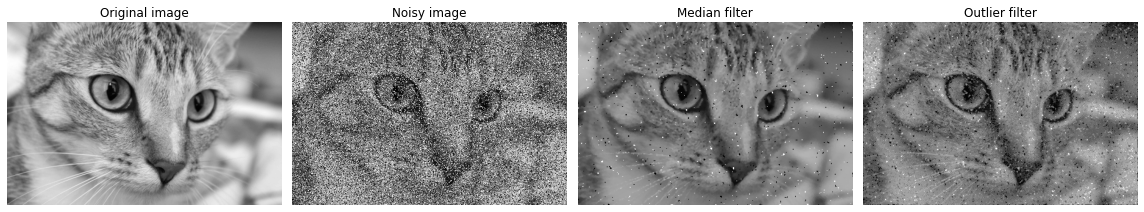

In [6]:
# outlier filter
res_img = outlierconv2d(noise_img, D=80)

# median filter
med_img = median(noise_img, square(3))


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 16))
ax = axes.ravel()
ax[0].imshow(gray_img, cmap='gray')
ax[0].set_title("Original image")
ax[1].imshow(noise_img, cmap='gray')
ax[1].set_title("Noisy image")
ax[2].imshow(med_img, cmap='gray')
ax[2].set_title("Median filter")
ax[3].imshow(res_img, cmap='gray')
ax[3].set_title("Outlier filter")

for a in ax:
    a.set_axis_off()

plt.tight_layout()
plt.show()